In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests as req
import json
import census as Census
import datetime as dt

conn = sqlite3.connect('FPA_FOD_20170508.sqlite')

In [2]:
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE, DISCOVERY_TIME, CONT_DATE, CONT_TIME, FIPS_NAME, FIRE_SIZE FROM 'Fires' where FIRE_YEAR >= 2009 order by DISCOVERY_DATE desc", conn)

In [3]:
df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2457387.5,0145,2457387.5,0200,None,0.1
1,2015,Arson,35.081190,-108.782890,NM,2457387.5,1645,2457387.5,1710,None,0.3
2,2015,Fireworks,26.596500,-81.739600,FL,2457387.5,2140,2457387.5,2239,Lee,1.0
3,2015,Debris Burning,31.658725,-97.473990,TX,2457387.5,None,NaN,None,Bosque,0.1
4,2015,Debris Burning,33.295893,-96.734075,TX,2457387.5,None,NaN,None,Collin,1.0


In [4]:
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONT_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')



In [5]:
random_df=df.sample(n=50)
random_df

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
163829,2013,Equipment Use,42.739722,-112.379444,ID,2013-07-28,1650,2013-07-30,1115,Bannock,156.00
43092,2015,Missing/Undefined,64.949250,-147.530277,AK,2015-05-16,None,NaT,None,None,0.10
101005,2014,Miscellaneous,29.707762,-98.122343,TX,2014-07-04,None,NaT,None,Comal,0.10
116594,2014,Miscellaneous,37.998770,-90.720880,MO,2014-04-19,1213,2014-04-19,1341,Washington,10.00
435662,2010,Miscellaneous,42.094367,-78.365994,NY,2010-03-31,None,NaT,None,Cattaraugus,1.00
410404,2010,Children,37.545972,-79.368139,VA,2010-07-08,None,NaT,None,Bedford,1.00
437982,2010,Smoking,36.016000,-76.952667,NC,2010-03-25,1345,2010-03-25,1416,Bertie,0.50
316417,2011,Missing/Undefined,34.088440,-118.596100,CA,2011-07-10,1330,2011-07-10,1355,None,0.10
468125,2009,Powerline,40.805323,-73.705385,NY,2009-07-29,2041,2009-07-29,2041,Nassau,1.50
154805,2013,Powerline,46.551200,-97.575200,ND,2013-09-01,None,2013-09-01,None,Barnes,0.05


In [6]:
df["STATE"].value_counts().plot(kind='bar',color='red', figsize=(20,3))


In [7]:
state_df=df.loc[(df["STATE"]=="TX") |(df["STATE"]=="CA") | (df["STATE"]=="GA") | (df["STATE"]=="NY") | (df["STATE"]=="NC"),:] 

In [8]:
state_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
3,2015,Debris Burning,31.658725,-97.473990,TX,2015-12-31,None,NaT,None,Bosque,0.10
4,2015,Debris Burning,33.295893,-96.734075,TX,2015-12-31,None,NaT,None,Collin,1.00
5,2015,Debris Burning,32.439411,-94.947366,TX,2015-12-31,None,NaT,None,Gregg,0.25
6,2015,Debris Burning,32.116021,-96.325207,TX,2015-12-31,None,NaT,None,Navarro,0.30
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01


In [9]:
random_df["Rain"]=""
random_df["Wind_Spd"]=""
random_df["WeatherDesc"]=""

In [10]:
key= "04e2cced184a450181130334171512" 

In [11]:
for index, row in random_df.iterrows():
    lat=row["LATITUDE"]
    lon=row["LONGITUDE"]
    date=row["DISCOVERY_DATE"]
    url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key=" +key  
    query= url + "&q="+ str(lat) + "," + str(lon) +  "&date=" + str(date) + "&format=json"
    weather = req.get(query).json()
    
    try:
        random_df.set_value(index,"Rain",weather["data"]["weather"][0]["hourly"][4]["precipMM"])
        random_df.set_value(index,"Wind_Spd",weather["data"]["weather"][0]['hourly'][4]['windspeedMiles'])
        random_df.set_value(index,"WeatherDesc",weather["data"]["weather"][0]['hourly'][4]['weatherDesc'][0]["value"])
        print("--", end="")
    
    except:
        continue
    
random_df.head()

----------------------------------------------------------------------------------------------------

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE,Rain,Wind_Spd,WeatherDesc
163829,2013,Equipment Use,42.739722,-112.379444,ID,2013-07-28,1650,2013-07-30,1115,Bannock,156.00,0.0,13,Sunny
43092,2015,Missing/Undefined,64.949250,-147.530277,AK,2015-05-16,None,NaT,None,None,0.10,0.0,13,Sunny
101005,2014,Miscellaneous,29.707762,-98.122343,TX,2014-07-04,None,NaT,None,Comal,0.10,0.0,5,Sunny
116594,2014,Miscellaneous,37.998770,-90.720880,MO,2014-04-19,1213,2014-04-19,1341,Washington,10.00,0.0,6,Sunny
435662,2010,Miscellaneous,42.094367,-78.365994,NY,2010-03-31,None,NaT,None,Cattaraugus,1.00,0.0,11,Sunny
410404,2010,Children,37.545972,-79.368139,VA,2010-07-08,None,NaT,None,Bedford,1.00,0.0,4,Sunny
437982,2010,Smoking,36.016000,-76.952667,NC,2010-03-25,1345,2010-03-25,1416,Bertie,0.50,0.0,10,Sunny
316417,2011,Missing/Undefined,34.088440,-118.596100,CA,2011-07-10,1330,2011-07-10,1355,None,0.10,0.0,7,Sunny
468125,2009,Powerline,40.805323,-73.705385,NY,2009-07-29,2041,2009-07-29,2041,Nassau,1.50,0.5,9,Light rain shower
154805,2013,Powerline,46.551200,-97.575200,ND,2013-09-01,None,2013-09-01,None,Barnes,0.05,0.0,10,Sunny


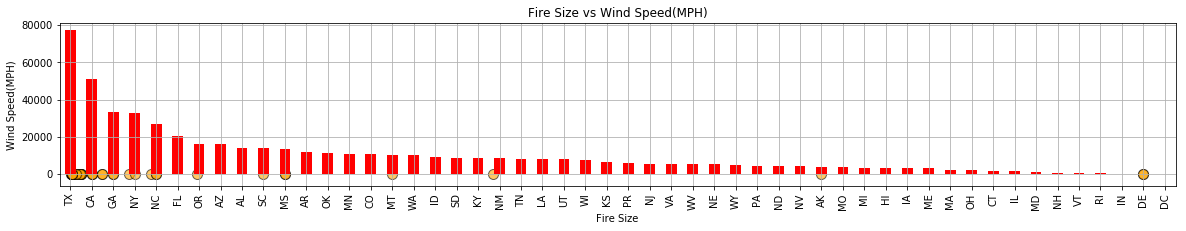

In [12]:
x_axis=random_df["FIRE_SIZE"]

plt.scatter(x_axis, random_df["Wind_Spd"],s=100,facecolors="orange",edgecolors="black",alpha=0.6)
plt.title("Fire Size vs Wind Speed(MPH)")
plt.xlabel("Fire Size")
plt.ylabel("Wind Speed(MPH)")
plt.grid("on")
plt.show()

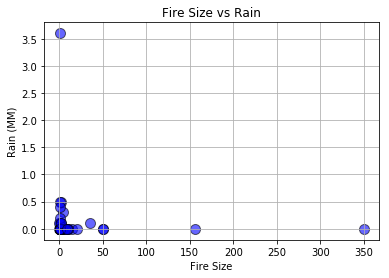

In [13]:
plt.scatter(x_axis, random_df["Rain"],s=100,facecolors="blue",edgecolors="black",alpha=0.6)
plt.title("Fire Size vs Rain")
plt.xlabel("Fire Size")
plt.ylabel("Rain (MM)")
plt.grid("on")
plt.show()

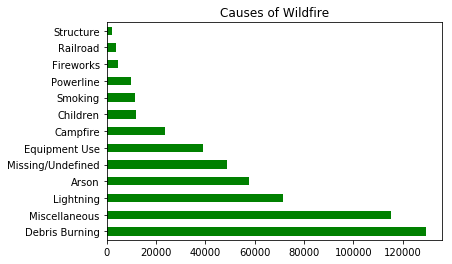

In [14]:
df["STAT_CAUSE_DESCR"].value_counts().plot(kind="barh",color="green",title="Causes of Wildfire")
plt.show()

In [15]:
lightning_df=df.loc[df["STAT_CAUSE_DESCR"]=="Lightning",:]

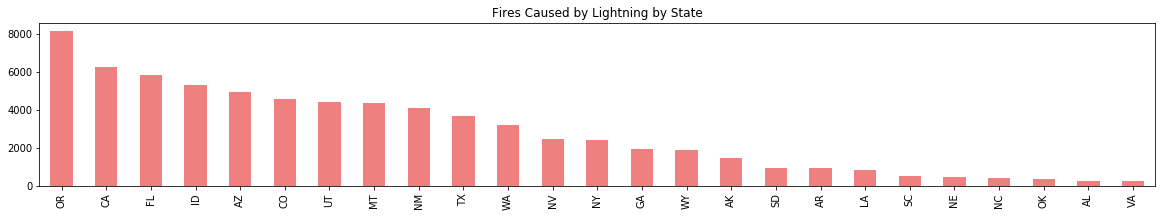

In [16]:
lightning_df["STATE"].value_counts().head(25).plot(kind="bar",color="lightcoral",title="Fires Caused by Lightning by State", figsize=(20,3))

plt.show()

In [17]:
containment_df = df[pd.notnull(df['CONT_DATE'])]

In [18]:
containment_df["CONT_TIME"]=containment_df["CONT_TIME"].astype("str")
containment_df["DISCOVERY_TIME"]=containment_df["DISCOVERY_TIME"].astype("str")
containment_df=containment_df.replace("None", np.nan)

C:\Users\holly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\holly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2015-12-31,0145,2015-12-31,0200,None,0.10
1,2015,Arson,35.081190,-108.782890,NM,2015-12-31,1645,2015-12-31,1710,None,0.30
2,2015,Fireworks,26.596500,-81.739600,FL,2015-12-31,2140,2015-12-31,2239,Lee,1.00
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01
8,2015,Miscellaneous,37.070000,-94.640000,KS,2015-12-31,1427,2015-12-31,1444,Cherokee,1.00
9,2015,Miscellaneous,39.540000,-101.670000,KS,2015-12-31,1451,2015-12-31,1610,Sherman,20.00
10,2015,Miscellaneous,42.763200,-106.540600,WY,2015-12-31,NaN,2015-12-31,NaN,Natrona,0.10
11,2015,Miscellaneous,30.168700,-82.851400,FL,2015-12-31,1826,2016-01-01,NaN,Suwannee,1.00
13,2015,Missing/Undefined,33.511928,-112.147062,AZ,2015-12-31,2348,2015-12-31,NaN,None,0.10
14,2015,Missing/Undefined,33.470948,-112.024130,AZ,2015-12-31,NaN,2015-12-31,1800,None,0.10


In [19]:
containment_df = containment_df[pd.notnull(df['DISCOVERY_TIME'])]
containment_df = containment_df[pd.notnull(df['CONT_TIME'])]

C:\Users\holly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\holly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2015-12-31,0145,2015-12-31,0200,None,0.10
1,2015,Arson,35.081190,-108.782890,NM,2015-12-31,1645,2015-12-31,1710,None,0.30
2,2015,Fireworks,26.596500,-81.739600,FL,2015-12-31,2140,2015-12-31,2239,Lee,1.00
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01
8,2015,Miscellaneous,37.070000,-94.640000,KS,2015-12-31,1427,2015-12-31,1444,Cherokee,1.00
9,2015,Miscellaneous,39.540000,-101.670000,KS,2015-12-31,1451,2015-12-31,1610,Sherman,20.00
15,2015,Missing/Undefined,33.578459,-111.773692,AZ,2015-12-31,1707,2015-12-31,1800,None,0.10
21,2015,Arson,39.173027,-121.057377,CA,2015-12-31,2132,2015-12-31,2139,Nevada,0.01
22,2015,Arson,34.022640,-110.479750,AZ,2015-12-30,0205,2015-12-31,1031,None,3.00
23,2015,Debris Burning,31.269778,-82.483044,GA,2015-12-30,1130,2015-12-30,1154,Ware,0.01


In [30]:
#get dates and times in the same format to contatenate
containment_df["DISCOVERY_DATE"]=containment_df["DISCOVERY_DATE"].astype('str')
containment_df["DISCOVERY_TIME"]=containment_df["DISCOVERY_TIME"].astype('str')
containment_df["CONT_DATE"]=containment_df["CONT_DATE"].astype('str')
containment_df["CONT_TIME"]=containment_df["CONT_TIME"].astype('str')


#contatenate dates and times
containment_df["DISCOVERY_DATETIME"]=containment_df["DISCOVERY_DATE"] + ' ' + containment_df["DISCOVERY_TIME"]
containment_df["CONT_DATETIME"]=containment_df["CONT_DATE"] + ' ' + containment_df["CONT_TIME"]
containment_df.head()

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE,DISCOVERY_DATETIME,CONT_DATETIME
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2015-12-31,0145,2015-12-31,0200,None,0.10,2015-12-31 0145,2015-12-31 0200
1,2015,Arson,35.081190,-108.782890,NM,2015-12-31,1645,2015-12-31,1710,None,0.30,2015-12-31 1645,2015-12-31 1710
2,2015,Fireworks,26.596500,-81.739600,FL,2015-12-31,2140,2015-12-31,2239,Lee,1.00,2015-12-31 2140,2015-12-31 2239
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01,2015-12-31 1446,2015-12-31 1451
8,2015,Miscellaneous,37.070000,-94.640000,KS,2015-12-31,1427,2015-12-31,1444,Cherokee,1.00,2015-12-31 1427,2015-12-31 1444


In [31]:
#convert DATETIME columns to datetime formula
containment_df["DISCOVERY_DATETIME"]=pd.to_datetime(containment_df["DISCOVERY_DATETIME"], format="%Y-%m-%d %H%M")
containment_df["CONT_DATETIME"]=pd.to_datetime(containment_df["CONT_DATETIME"], format="%Y-%m-%d %H%M")
containment_df.head()


,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE,DISCOVERY_DATETIME,CONT_DATETIME
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2015-12-31,0145,2015-12-31,0200,None,0.10,2015-12-31 01:45:00,2015-12-31 02:00:00
1,2015,Arson,35.081190,-108.782890,NM,2015-12-31,1645,2015-12-31,1710,None,0.30,2015-12-31 16:45:00,2015-12-31 17:10:00
2,2015,Fireworks,26.596500,-81.739600,FL,2015-12-31,2140,2015-12-31,2239,Lee,1.00,2015-12-31 21:40:00,2015-12-31 22:39:00
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01,2015-12-31 14:46:00,2015-12-31 14:51:00
8,2015,Miscellaneous,37.070000,-94.640000,KS,2015-12-31,1427,2015-12-31,1444,Cherokee,1.00,2015-12-31 14:27:00,2015-12-31 14:44:00


In [33]:
#add a column to calculate how long the fire was burning
containment_df["FIRE_DURATION"]=containment_df["CONT_DATETIME"]- containment_df["DISCOVERY_DATETIME"]
containment_df

,FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,FIPS_NAME,FIRE_SIZE,DISCOVERY_DATETIME,CONT_DATETIME,FIRE_DURATION
0,2015,Miscellaneous,33.267310,-111.997810,AZ,2015-12-31,0145,2015-12-31,0200,None,0.10,2015-12-31 01:45:00,2015-12-31 02:00:00,0 days 00:15:00
1,2015,Arson,35.081190,-108.782890,NM,2015-12-31,1645,2015-12-31,1710,None,0.30,2015-12-31 16:45:00,2015-12-31 17:10:00,0 days 00:25:00
2,2015,Fireworks,26.596500,-81.739600,FL,2015-12-31,2140,2015-12-31,2239,Lee,1.00,2015-12-31 21:40:00,2015-12-31 22:39:00,0 days 00:59:00
7,2015,Arson,31.484142,-82.813569,GA,2015-12-31,1446,2015-12-31,1451,Coffee,0.01,2015-12-31 14:46:00,2015-12-31 14:51:00,0 days 00:05:00
8,2015,Miscellaneous,37.070000,-94.640000,KS,2015-12-31,1427,2015-12-31,1444,Cherokee,1.00,2015-12-31 14:27:00,2015-12-31 14:44:00,0 days 00:17:00
9,2015,Miscellaneous,39.540000,-101.670000,KS,2015-12-31,1451,2015-12-31,1610,Sherman,20.00,2015-12-31 14:51:00,2015-12-31 16:10:00,0 days 01:19:00
15,2015,Missing/Undefined,33.578459,-111.773692,AZ,2015-12-31,1707,2015-12-31,1800,None,0.10,2015-12-31 17:07:00,2015-12-31 18:00:00,0 days 00:53:00
21,2015,Arson,39.173027,-121.057377,CA,2015-12-31,2132,2015-12-31,2139,Nevada,0.01,2015-12-31 21:32:00,2015-12-31 21:39:00,0 days 00:07:00
22,2015,Arson,34.022640,-110.479750,AZ,2015-12-30,0205,2015-12-31,1031,None,3.00,2015-12-30 02:05:00,2015-12-31 10:31:00,1 days 08:26:00
23,2015,Debris Burning,31.269778,-82.483044,GA,2015-12-30,1130,2015-12-30,1154,Ware,0.01,2015-12-30 11:30:00,2015-12-30 11:54:00,0 days 00:24:00
